In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib


[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax
from matplotlib.animation import FuncAnimation

In [3]:
data = pd.read_csv("data_for_lr.csv")

data = data.dropna()

train_input = np.array(data.x[0:500]).reshape(500, 1)
train_output = np.array(data.y[0:500]).reshape(500, 1)

test_input = np.array(data.x[500:700]).reshape(199, 1)
test_output = np.array(data.y[500:700]).reshape(199, 1)

In [4]:
class LinearRegression: 
    def __init__(self): 
        self.parameters = {} 

    def forward_propagation(self, train_input): 
        m = self.parameters['m'] 
        c = self.parameters['c'] 
        predictions = np.multiply(m, train_input) + c 
        return predictions 

    def cost_function(self, predictions, train_output): 
        cost = np.mean((train_output - predictions) ** 2) 
        return cost 

    def backward_propagation(self, train_input, train_output, predictions): 
        derivatives = {} 
        df = (predictions-train_output) 
        dm = 2 * np.mean(np.multiply(train_input, df)) 
        dc = 2 * np.mean(df) 
        derivatives['dm'] = dm 
        derivatives['dc'] = dc 
        return derivatives 

    def update_parameters(self, derivatives, learning_rate): 
        self.parameters['m'] = self.parameters['m'] - learning_rate * derivatives['dm'] 
        self.parameters['c'] = self.parameters['c'] - learning_rate * derivatives['dc'] 

    def train(self, train_input, train_output, learning_rate, iters): 
        self.parameters['m'] = np.random.uniform(0, 1) * -1
        self.parameters['c'] = np.random.uniform(0, 1) * -1

        self.loss = [] 

        fig, ax = plt.subplots() 
        x_vals = np.linspace(min(train_input), max(train_input), 100) 
        line, = ax.plot(x_vals, self.parameters['m'] * x_vals + self.parameters['c'], color='red', label='Regression Line') 
        ax.scatter(train_input, train_output, marker='o', color='green', label='Training Data') 

        ax.set_ylim(0, max(train_output) + 1) 

        def update(frame): 
            predictions = self.forward_propagation(train_input) 
            cost = self.cost_function(predictions, train_output) 
            derivatives = self.backward_propagation(train_input, train_output, predictions) 
            self.update_parameters(derivatives, learning_rate) 
            line.set_ydata(self.parameters['m'] * x_vals + self.parameters['c']) 
            self.loss.append(cost) 
            print("Iteration = {}, Loss = {}".format(frame + 1, cost)) 
            return line, 

        ani = FuncAnimation(fig, update, frames=iters, interval=200, blit=True) 
        ani.save('linear_regression_A.gif', writer='ffmpeg') 

        plt.xlabel('Input') 
        plt.ylabel('Output') 
        plt.title('Linear Regression') 
        plt.legend() 
        plt.show() 

        return self.parameters, self.loss

MovieWriter ffmpeg unavailable; using Pillow instead.


Iteration = 1, Loss = 11788.680178270495
Iteration = 1, Loss = 1427.5534357806584
Iteration = 1, Loss = 178.9249055456795
Iteration = 1, Loss = 28.451578145049258
Iteration = 2, Loss = 10.317903540315996
Iteration = 3, Loss = 8.132597305593237
Iteration = 4, Loss = 7.86924302030436
Iteration = 5, Loss = 7.837504860990848
Iteration = 6, Loss = 7.833678965568891
Iteration = 7, Loss = 7.833216801816668
Iteration = 8, Loss = 7.8331600044480005
Iteration = 9, Loss = 7.833152058251
Iteration = 10, Loss = 7.833149999262785
Iteration = 11, Loss = 7.833148649858257
Iteration = 12, Loss = 7.833147386077233
Iteration = 13, Loss = 7.833146132725715
Iteration = 14, Loss = 7.833144880741986
Iteration = 15, Loss = 7.833143629034008
Iteration = 16, Loss = 7.833142377470164
Iteration = 17, Loss = 7.833141126034583
Iteration = 18, Loss = 7.8331398747253385
Iteration = 19, Loss = 7.83313862354219
Iteration = 20, Loss = 7.833137372485097


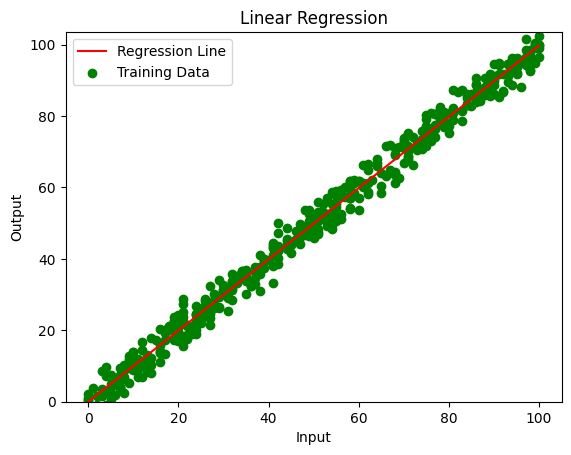

In [5]:
linear_reg = LinearRegression()
parameters, loss = linear_reg.train(train_input, train_output, 0.0001, 20)

In [8]:
predictions = linear_reg.forward_propagation(test_input)
errors = predictions - test_output
print(errors)

[[-2.70787353]
 [-0.17670181]
 [-6.73067509]
 [ 3.27719708]
 [ 1.95050636]
 [ 0.28052923]
 [-1.42029336]
 [-1.9505801 ]
 [ 4.09370518]
 [ 0.91740791]
 [-1.28867184]
 [ 0.38681392]
 [-2.70128687]
 [ 0.87211733]
 [-0.03010221]
 [ 0.51218996]
 [-0.39910974]
 [-3.54709969]
 [ 2.3083559 ]
 [-1.29698846]
 [-1.26970224]
 [ 2.50093645]
 [-3.25990147]
 [ 2.05257403]
 [-2.15098607]
 [-4.24529651]
 [ 1.9553924 ]
 [-5.97932591]
 [-0.35783688]
 [ 0.41364106]
 [-1.21842665]
 [ 1.16177716]
 [-0.88624066]
 [-2.85943849]
 [ 0.57678293]
 [-3.51186008]
 [-0.3428078 ]
 [-2.42729141]
 [-1.73119322]
 [-5.02352422]
 [ 1.17057437]
 [-7.28912164]
 [ 0.53188918]
 [ 5.49928721]
 [ 2.32310111]
 [-0.48545511]
 [ 0.6700119 ]
 [ 1.26293637]
 [-1.93283479]
 [ 2.9610947 ]
 [-0.15001718]
 [ 5.6596748 ]
 [-5.20785142]
 [ 0.59007327]
 [-1.82346898]
 [-1.57380669]
 [-4.74146011]
 [-0.98562335]
 [ 2.05068328]
 [ 0.10866837]
 [-3.02950956]
 [ 0.4965945 ]
 [-1.90594373]
 [ 1.48505424]
 [-7.44885808]
 [ 0.10421828]
 [-0.71807